In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='Malgun Gothic') # For Windows

# plt.rc('font', family='NanumGothic') # For Windows

print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.v
import numpy as np

['Malgun Gothic']


In [2]:
# 지수표현 제거
pd.options.display.float_format = '{:.5f}'.format

In [3]:
data=pd.read_csv('data/cluster0.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16502 entries, 0 to 16501
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         16502 non-null  int64  
 1   birth_year         16502 non-null  int64  
 2   credit_score       16502 non-null  float64
 3   yearly_income      16502 non-null  float64
 4   income_type        16502 non-null  object 
 5   employment_type    16502 non-null  object 
 6   houseown_type      16502 non-null  object 
 7   desired_amount     16502 non-null  float64
 8   purpose            16502 non-null  object 
 9   existing_loan_cnt  16502 non-null  float64
 10  existing_loan_amt  16502 non-null  float64
 11  gender             16502 non-null  float64
 12  time               16502 non-null  int64  
 13  cluster            16502 non-null  int64  
 14  count              16502 non-null  int64  
 15  kmeans_minmax      16502 non-null  int64  
dtypes: float64(6), int64(6

In [4]:
# 첫 번째 열 삭제
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,birth_year,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,gender,time,cluster,count,kmeans_minmax
0,30,550.00000,41000000.00000,EARNEDINCOME,계약직,전월세,5000000.00000,전월세보증금,2.00000,42000000.00000,1.00000,386,0,1,0
1,30,980.00000,30000000.00000,EARNEDINCOME,정규직,전월세,10000000.00000,생활비,1.00000,30000000.00000,1.00000,33,0,1,3
2,40,830.00000,250000000.00000,PRIVATEBUSINESS,정규직,전월세,600000000.00000,전월세보증금,4.00000,255000000.00000,0.00000,215,0,1,1
3,20,880.00000,53000000.00000,PRACTITIONER,정규직,전월세,130000000.00000,전월세보증금,2.00000,127000000.00000,0.00000,411,0,1,1
4,40,620.00000,42000000.00000,EARNEDINCOME,정규직,전월세,5000000.00000,생활비,2.00000,20000000.00000,1.00000,1023,0,1,3


In [5]:
# 지수표현 제거
pd.options.display.float_format = '{:.5f}'.format

first_desc=data.groupby('kmeans_minmax').apply(lambda x : x.describe())
first_desc

birth_year  credit_score    yearly_income  \
kmeans_minmax                                                    
0             count  4844.00000    4844.00000       4844.00000   
              mean     33.76135     762.89017   55112303.88109   
              std       9.08432     142.23238   55455419.13647   
              min      20.00000     100.00000          0.00000   
              25%      30.00000     640.00000   34000000.00000   
              50%      30.00000     740.00000   45000000.00000   
              75%      40.00000     900.00000   60000000.00000   
              max      70.00000    1000.00000 2000000000.00000   
1             count  3786.00000    3786.00000       3786.00000   
              mean     32.78658     711.69572   40661119.91548   
              std      10.29424     136.09880  128896888.95903   
              min      10.00000     100.00000          0.00000   
              25%      20.00000     610.00000   24000000.00000   
              50%      30.00000     680.00000   30000000.00000   
              75%      40.00000     810.00000   40000000.00000   
              max      80.00000    1000.00000 5333000000.00000   
2             count  4394.00000    4394.00000       4394.00000   
              mean     35.00228     724.35366   36833409.19436   
              std      11.93397     111.32811   57720793.25462   
              min      10.00000     440.00000          0.00000   
              25%      30.00000     640.00000   12000000.00000   
              50%      30.00000     700.00000   30000000.00000   
              75%      40.00000     790.00000   45000000.00000   
              max      80.00000    1000.00000 1500000000.00000   
3             count  3478.00000    3478.00000       3478.00000   
              mean     34.23232     708.79816   48934445.08338   
              std      10.28079     140.77334  120282400.73115   
              min      10.00000     100.00000          0.00000   
              25%      30.00000     610.00000   30000000.00000   
              50%      30.00000     680.00000   40000000.00000   
              75%      40.00000     810.00000   54000000.00000   
              max      70.00000    1000.00000 6400000000.00000   

                      desired_amount  existing_loan_cnt  existing_loan_amt  \
kmeans_minmax                                                                
0             count       4844.00000         4844.00000         4844.00000   
              mean    81841040.46243            3.55202     91330924.85549   
              std    158162847.04850            3.02122    114169430.19717   
              min            0.00000            1.00000            0.00000   
              25%     20000000.00000            2.00000     26000000.00000   
              50%     40000000.00000            3.00000     47000000.00000   
              75%     80000000.00000            4.00000    103000000.00000   
              max   4000000000.00000          107.00000   1340000000.00000   
1             count       3786.00000         3786.00000         3786.00000   
              mean    48525884.83888            3.65161     59176439.51400   
              std    169309282.91030            3.06217     73354329.33603   
              min            0.00000            1.00000            0.00000   
              25%     10000000.00000            2.00000     19000000.00000   
              50%     20000000.00000            3.00000     37000000.00000   
              75%     43750000.00000            5.00000     65000000.00000   
              max   5000000000.00000           84.00000   1107000000.00000   
2             count       4394.00000         4394.00000         4394.00000   
              mean    38914428.76650            3.32203     45573509.33091   
              std    204235373.59447            2.60580     72255205.00130   
              min            0.00000            1.00000            0.00000   
              25%      5000000.00000            2.00000     

## 범주형 변수

In [6]:
# 군집별 범주형 변수의 차이
first_mode=data.groupby('kmeans_minmax').apply(lambda x : x.mode())
first_mode

,,birth_year,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,gender,time,cluster,count,kmeans_minmax
kmeans_minmax,,,,,,,,,,,,,,,,
0,0,30,950.00000,50000000.00000,EARNEDINCOME,정규직,전월세,50000000.00000,대환대출,3.00000,18000000.00000,1.00000,0,0,1,0
1,0,30,630.00000,30000000.00000,EARNEDINCOME,정규직,전월세,10000000.00000,생활비,3.00000,18000000.00000,0.00000,0,0,1,1
2,0,30,650.00000,30000000.00000,OTHERINCOME,기타,전월세,10000000.00000,생활비,3.00000,18000000.00000,1.00000,0,0,1,2
3,0,30,610.00000,30000000.00000,EARNEDINCOME,정규직,전월세,10000000.00000,생활비,3.00000,18000000.00000,1.00000,0,0,1,3


In [31]:
plt.rc('font',family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


군집별 범주형변수의 차이를 보면 2번 군집들이 income_type(수입형태),employment_type(고용형태)에서 다른 범주에 속하는 것을 알 수 있다.
또한 0번 군집의 대출의 주목적은 대환대출로 볼 수 있다.

<class 'numpy.ndarray'>


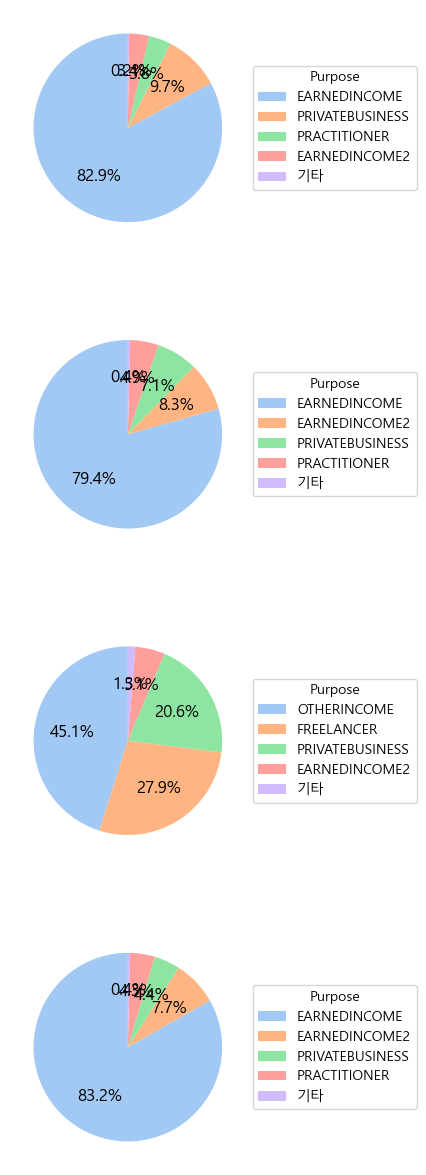

In [11]:
# 범주형 원 그래프
# cluster별 purpose비율
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(4,1)
print(type(axes))
# 격자 크기 설정
f.set_size_inches((15, 15))
# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
# 색깔
colors = sns.color_palette('pastel')[0:5]

for i in range(4):
    cluster = data[data['kmeans_minmax']==i]
    tmp_df=cluster.groupby(['income_type'])['income_type'].count().sort_values(ascending=False)

    
    group_size=tmp_df.values[:4].tolist() + [tmp_df.values[4:].sum()]
    group_name=[idx for idx in tmp_df.index[:4]] + ['기타']
    
    wedges, texts, autotexts = axes[i].pie(group_size, autopct='%1.1f%%', startangle=90,
                                           colors=colors,
                                          textprops={'fontsize': 12})
    axes[i].legend(wedges, group_name,
          title="Purpose",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()  




<class 'numpy.ndarray'>


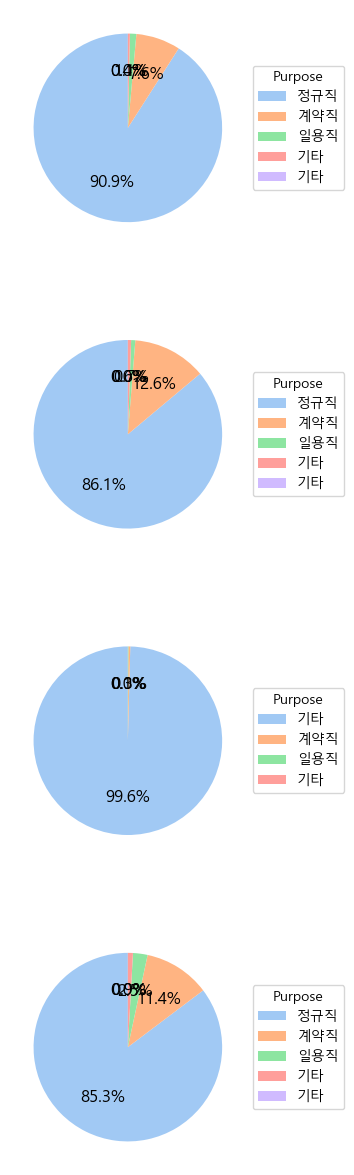

In [12]:
# 범주형 원 그래프
# cluster별 purpose비율
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(4,1)
print(type(axes))
# 격자 크기 설정
f.set_size_inches((15, 15))
# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
# 색깔
colors = sns.color_palette('pastel')[0:5]

for i in range(4):
    cluster = data[data['kmeans_minmax']==i]
    tmp_df=cluster.groupby(['employment_type'])['employment_type'].count().sort_values(ascending=False)

    
    group_size=tmp_df.values[:4].tolist() + [tmp_df.values[4:].sum()]
    group_name=[idx for idx in tmp_df.index[:4]] + ['기타']
    
    wedges, texts, autotexts = axes[i].pie(group_size, autopct='%1.1f%%', startangle=90,
                                           colors=colors,
                                          textprops={'fontsize': 12})
    axes[i].legend(wedges, group_name,
          title="Purpose",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()  




<class 'numpy.ndarray'>


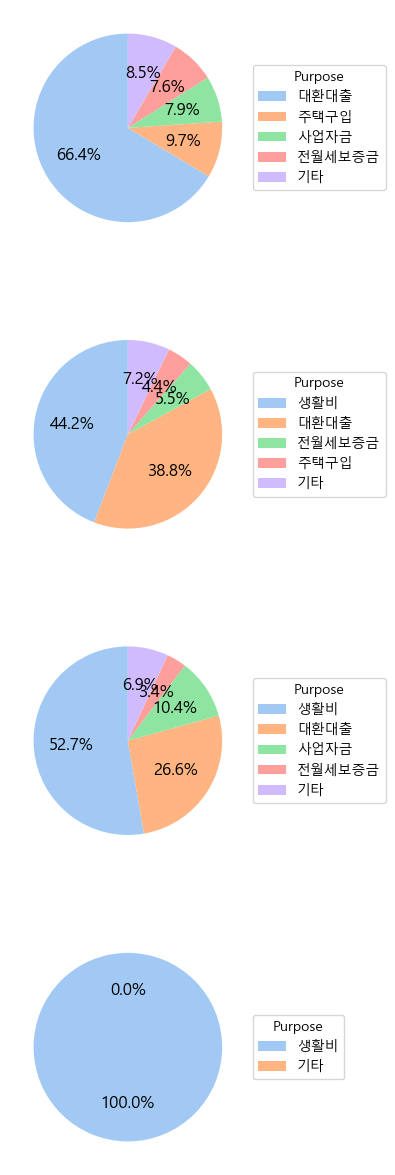

In [10]:
# 범주형 원 그래프
# cluster별 purpose비율
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(4,1)
print(type(axes))
# 격자 크기 설정
f.set_size_inches((15, 15))
# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
# 색깔
colors = sns.color_palette('pastel')[0:5]

for i in range(4):
    cluster = data[data['kmeans_minmax']==i]
    tmp_df=cluster.groupby(['purpose'])['purpose'].count().sort_values(ascending=False)

    
    group_size=tmp_df.values[:4].tolist() + [tmp_df.values[4:].sum()]
    group_name=[idx for idx in tmp_df.index[:4]] + ['기타']
    
    wedges, texts, autotexts = axes[i].pie(group_size, autopct='%1.1f%%', startangle=90,
                                           colors=colors,
                                          textprops={'fontsize': 12})
    axes[i].legend(wedges, group_name,
          title="Purpose",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()  




## 수치형 변수

In [45]:
# 군집별 수치형 변수의 차이
first_mean=data.groupby('kmeans_minmax').agg(lambda x : x.mean())
first_mean

,birth_year,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,gender,time,cluster,count
kmeans_minmax,,,,,,,,,,
0,33.76135,762.89017,55112303.88109,81841040.46243,3.55202,91330924.85549,1.00000,772.04418,0.00000,2.44880
1,32.78658,711.69572,40661119.91548,48525884.83888,3.65161,59176439.51400,0.00000,861.80058,0.00000,2.74062
2,35.00228,724.35366,36833409.19436,38914428.76650,3.32203,45573509.33091,0.57351,767.83796,0.00000,2.49090
3,34.23232,708.79816,48934445.08338,32794134.56009,3.96320,80265094.88212,1.00000,837.71852,0.00000,3.08424


In [48]:
# 군집별 yearly_income의 평균 차이가 있는가?
# 일원배치 분산분석
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#정규성 확인 - 집단(수준)별로 실시

from  scipy.stats import shapiro
print(shapiro(data.yearly_income[data.kmeans_minmax==0]))
print(shapiro(data.yearly_income[data.kmeans_minmax==1]))
print(shapiro(data.yearly_income[data.kmeans_minmax==2]))
print(shapiro(data.yearly_income[data.kmeans_minmax==3]))

#등분산성 확인 - 레빈 검증

from scipy.stats import levene
print(levene(data.yearly_income[data.kmeans_minmax==0],
      data.yearly_income[data.kmeans_minmax==1],
      data.yearly_income[data.kmeans_minmax==2],
      data.yearly_income[data.kmeans_minmax==3]))
## * 등분산성 확인 - 등분산 가정이 성립되지 않는다.



# welch anova
import pingouin as pg
pg.welch_anova(dv = 'yearly_income', between = 'kmeans_minmax', data = data)

## 결과: 유의확률 p값이 유의수준 0.05보다 작으므로 유의한 차이가 있다고 봐 귀무가설을 기각할 수 있다.
##       따라서 군집별 yearly_income의 차이가 있다고 볼 수있다.

ShapiroResult(statistic=0.3892717957496643, pvalue=0.0)
ShapiroResult(statistic=0.0765770673751831, pvalue=0.0)
ShapiroResult(statistic=0.4126130938529968, pvalue=0.0)
ShapiroResult(statistic=0.09193742275238037, pvalue=0.0)
LeveneResult(statistic=3.033666585259951, pvalue=0.028006153277209685)


,Source,ddof1,ddof2,F,p-unc,np2
0,kmeans_minmax,3,8064.97906,83.07274,0.00000,0.00631


In [47]:
#정규성 확인 - 집단(수준)별로 실시

from  scipy.stats import shapiro
print(shapiro(data.yearly_income[data.kmeans_minmax==0]))
print(shapiro(data.yearly_income[data.kmeans_minmax==1]))
print(shapiro(data.yearly_income[data.kmeans_minmax==2]))


ShapiroResult(statistic=0.3892717957496643, pvalue=0.0)
ShapiroResult(statistic=0.0765770673751831, pvalue=0.0)
ShapiroResult(statistic=0.4126130938529968, pvalue=0.0)


In [49]:
#등분산성 확인 - 레빈 검증

from scipy.stats import levene
print(levene(data.yearly_income[data.kmeans_minmax==0],
      data.yearly_income[data.kmeans_minmax==1],
      data.yearly_income[data.kmeans_minmax==2],
      data.yearly_income[data.kmeans_minmax==3]))

LeveneResult(statistic=3.033666585259951, pvalue=0.028006153277209685)


In [ ]:
# 군집별 desired_amount의 평균 차이가 있는가?
# 일원배치 분산분석
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#정규성 확인 - 집단(수준)별로 실시

from  scipy.stats import shapiro
print(shapiro(data.desired_amount[data.kmeans_minmax==0]))
print(shapiro(data.desired_amount[data.kmeans_minmax==1]))
print(shapiro(data.desired_amount[data.kmeans_minmax==2]))
print(shapiro(data.desired_amount[data.kmeans_minmax==2]))

#등분산성 확인 - 레빈 검증

from scipy.stats import levene
print(levene(data.desired_amount[data.kmeans_minmax==0],
      data.desired_amount[data.kmeans_minmax==1],
      data.desired_amount[data.kmeans_minmax==2]))
## * 등분산성 확인 - 등분산 가정이 성립되지 않는다.



# welch anova
import pingouin as pg
pg.welch_anova(dv = 'desired_amount', between = 'kmeans_minmax', data = data)

## 결과: 유의확률 p값이 유의수준 0.05보다 작으므로 유의한 차이가 있다고 봐 귀무가설을 기각할 수 있다.
##       따라서 군집별 desired_amount의 차이가 있다고 볼 수있다.

In [ ]:
# 군집별 existing_loan_amt의 평균 차이가 있는가?
# 일원배치 분산분석
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#정규성 확인 - 집단(수준)별로 실시

from  scipy.stats import shapiro
print(shapiro(data.existing_loan_amt[data.kmeans_minmax==0]))
print(shapiro(data.existing_loan_amt[data.kmeans_minmax==1]))
print(shapiro(data.existing_loan_amt[data.kmeans_minmax==2]))

#등분산성 확인 - 레빈 검증

from scipy.stats import levene
print(levene(data.existing_loan_amt[data.kmeans_minmax==0],
      data.existing_loan_amt[data.kmeans_minmax==1],
      data.existing_loan_amt[data.kmeans_minmax==2]))
## * 등분산성 확인 - 등분산 가정이 성립되지 않는다.


# welch anova
import pingouin as pg
pg.welch_anova(dv = 'existing_loan_amt', between = 'kmeans_minmax', data = data)

## 결과: 유의확률 p값이 유의수준 0.05보다 작으므로 유의한 차이가 있다고 봐 귀무가설을 기각할 수 있다.
##       따라서 군집별 existing_loan_amt의 차이가 있다고 볼 수있다.

In [ ]:
# 군집별 time의 평균 차이가 있는가?
# 일원배치 분산분석
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#정규성 확인 - 집단(수준)별로 실시

from  scipy.stats import shapiro
print(shapiro(data.time[data.kmeans_minmax==0]))
print(shapiro(data.time[data.kmeans_minmax==1]))
print(shapiro(data.time[data.kmeans_minmax==2]))

#등분산성 확인 - 레빈 검증

from scipy.stats import levene
print(levene(data.time[data.kmeans_minmax==0],
      data.time[data.kmeans_minmax==1],
      data.time[data.kmeans_minmax==2]))
## * 등분산성 확인 - 등분산 가정이 성립되지 않는다.



# welch anova
import pingouin as pg
pg.welch_anova(dv = 'time', between = 'kmeans_minmax', data = data)

## 결과: 유의확률 p값이 유의수준 0.05보다 작으므로 유의한 차이가 있다고 봐 귀무가설을 기각할 수 있다.
##       따라서 군집별 time의 차이가 있다고 볼 수있다.

In [ ]:
# 군집별 credit_score 평균 차이가 있는가?
# 일원배치 분산분석
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#정규성 확인 - 집단(수준)별로 실시

from  scipy.stats import shapiro
print(shapiro(data.credit_score[data.kmeans_minmax==0]))
print(shapiro(data.credit_score[data.kmeans_minmax==1]))
print(shapiro(data.credit_score[data.kmeans_minmax==2]))

#등분산성 확인 - 레빈 검증

from scipy.stats import levene
print(levene(data.credit_score[data.kmeans_minmax==0],
      data.credit_score[data.kmeans_minmax==1],
      data.credit_score[data.kmeans_minmax==2]))
## * 등분산성 확인 - 등분산 가정이 성립되지 않는다.



# welch anova
import pingouin as pg
pg.welch_anova(dv = 'credit_score', between = 'kmeans_minmax', data = data)

## 결과: 유의확률 p값이 유의수준 0.05보다 작으므로 유의한 차이가 있다고 봐 귀무가설을 기각할 수 있다.
##       따라서 군집별 yearly_income의 차이가 있다고 볼 수있다.

In [33]:
#정규성 확인 - 집단(수준)별로 실시

from  scipy.stats import shapiro
print(shapiro(data.credit_score[data.kmeans_minmax==0]))
print(shapiro(data.credit_score[data.kmeans_minmax==1]))
print(shapiro(data.credit_score[data.kmeans_minmax==2]))

ShapiroResult(statistic=0.9441478848457336, pvalue=2.0481028029955445e-39)
ShapiroResult(statistic=0.9383472800254822, pvalue=4.6818408564606796e-37)
ShapiroResult(statistic=0.9534944295883179, pvalue=2.857872713787129e-35)


In [34]:
#등분산성 확인 - 레빈 검증

from scipy.stats import levene
print(levene(data.credit_score[data.kmeans_minmax==0],
      data.credit_score[data.kmeans_minmax==1],
      data.credit_score[data.kmeans_minmax==2]))

LeveneResult(statistic=226.720182230937, pvalue=1.6304879786329827e-97)


In [26]:

model = ols('existing_loan_amt ~ C(kmeans_minmax)', data).fit()
anova_lm(model)

# 결과

,df,sum_sq,mean_sq,F,PR(>F)
C(kmeans_minmax),3.00000,5630550455381181440.00000,1876850151793727232.00000,212.37129,0.00000
Residual,16498.00000,145802543004866084864.00000,8837588980777433.00000,NaN,NaN


In [35]:
# welch anova
import pingouin as pg
pg.welch_anova(dv = 'credit_score', between = 'kmeans_minmax', data = data)

,Source,ddof1,ddof2,F,p-unc,np2
0,kmeans_minmax,3,8807.17405,138.34884,0.00000,0.02739
